In [32]:
import pandas_datareader as pdr
import pandas as pd
key="9722c8729f9ef2886edeba557d5858e025ff81a3"

In [33]:
# df = pdr.get_data_tiingo('AAPL', api_key = 9722c8729f9ef2886edeba557d5858e025ff81a3)
df = pdr.get_data_tiingo('AAPL', api_key= key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [34]:
df.to_csv('AAPL.csv')

In [35]:
df = pd.read_csv('AAPL.csv')

In [36]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-08-10 00:00:00+00:00,155.32,160.0000,154.63,159.90,39081017,36.850189,37.960535,36.686484,37.936810,156324068,0.63,1.0
1,AAPL,2017-08-11 00:00:00+00:00,157.48,158.5728,156.07,156.60,25943187,37.362656,37.621927,37.028129,37.153874,103772748,0.00,1.0
2,AAPL,2017-08-14 00:00:00+00:00,159.85,160.2100,158.75,159.32,21754810,37.924947,38.010358,37.663968,37.799203,87019240,0.00,1.0
3,AAPL,2017-08-15 00:00:00+00:00,161.60,162.1950,160.14,160.66,27936774,38.340140,38.481306,37.993750,38.117122,111747096,0.00,1.0
4,AAPL,2017-08-16 00:00:00+00:00,160.95,162.5100,160.15,161.94,27321761,38.185926,38.556041,37.996123,38.420806,109287044,0.00,1.0


In [37]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2022-08-02 00:00:00+00:00,160.01,162.41,159.63,160.100,59907025,159.787737,162.184403,159.408265,159.877612,59907025,0.00,1.0
1253,AAPL,2022-08-03 00:00:00+00:00,166.13,166.59,160.75,160.840,82507488,165.899236,166.358597,160.526709,160.616584,82507488,0.00,1.0
1254,AAPL,2022-08-04 00:00:00+00:00,165.81,167.19,164.43,166.005,55474144,165.579681,166.957764,164.201597,165.774410,55474144,0.00,1.0
1255,AAPL,2022-08-05 00:00:00+00:00,165.35,165.85,163.00,163.210,56696985,165.350000,165.850000,163.000000,163.210000,56696985,0.23,1.0
1256,AAPL,2022-08-08 00:00:00+00:00,164.87,167.81,164.20,166.370,60362338,164.870000,167.810000,164.200000,166.370000,60362338,0.00,1.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [39]:
df1 = df.reset_index()["close"]

In [40]:
df1

0       155.32
1       157.48
2       159.85
3       161.60
4       160.95
         ...  
1252    160.01
1253    166.13
1254    165.81
1255    165.35
1256    164.87
Name: close, Length: 1257, dtype: float64

there is no missing values

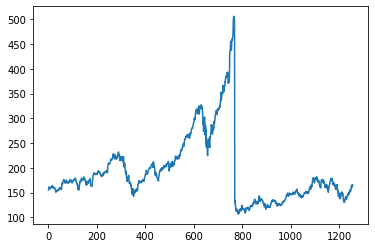

In [41]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [42]:
#there is sharp fall in the close value may be it is around covid time, so effect of that

In [43]:
#LSTM is very much sensitive to the scale of the data. So we apply scaler

#we could have done more things before hand like corr matrix, heat map, other things

## Preprocess the data- Train and Test split 

for normally during the regression or classification problem we ca use for train test split --
Cross validation
random seed as follows

In [44]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))   ## scale to 0 to 1 as time series data that is day variation is 0 to 1 so label --> close price should also be in same scale
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [45]:
df1.shape

(1257, 1)

In [46]:
# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(df1, test_size = 0.2, random_state = 42)

But for the time series data --> Train and test devided as follows

In [47]:
## splitting the dataset into train and test split, whenever we have time series data the next data is dependent on previous data so we split as follows

In [48]:
df1

array([[0.12142768],
       [0.12683782],
       [0.13277395],
       ...,
       [0.14770194],
       [0.14654978],
       [0.14534753]])

In [49]:
train_size = int(len(df1)*0.65)   # 65% of the total data as train data
test_size = len(df1)-train_size
train_data, test_data = df1[0:train_size, :], df1[train_size:len(df1), :1]

In [50]:
train_size, test_size

(817, 440)

In [58]:
train_data[100]

array([0.16378209])

In [52]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [56]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [57]:
print(X_train)

[[0.12142768 0.12683782 0.13277395 ... 0.16090169 0.156268   0.16385723]
 [0.12683782 0.13277395 0.13715717 ... 0.156268   0.16385723 0.16378209]
 [0.13277395 0.13715717 0.13552912 ... 0.16385723 0.16378209 0.16578585]
 ...
 [0.57372574 0.58098936 0.59148403 ... 0.01092048 0.02123982 0.00505949]
 [0.58098936 0.59148403 0.61425172 ... 0.02123982 0.00505949 0.00483406]
 [0.59148403 0.61425172 0.61302442 ... 0.00505949 0.00483406 0.00901691]]


In [60]:
print(X_train.shape)   # yeah I can make sense of this as total iteration in time step =len(train_data)-time_step-1, where time_step=100

(716, 100)


In [ ]:
print(Y_train)  # for  0 to 99 which goes into X_train Y_train is the 100th element of the train_data

In [63]:
print(X_test.shape)

(339, 100)


In [70]:
# reshape the 2-d X matrix data into 3-d [samples, time steps, features] , this is required for LSTM model. It's just like we do sanpshot matrix for DMD
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)



In [71]:
X_train

array([[[0.12142768],
        [0.12683782],
        [0.13277395],
        ...,
        [0.16090169],
        [0.156268  ],
        [0.16385723]],

       [[0.12683782],
        [0.13277395],
        [0.13715717],
        ...,
        [0.156268  ],
        [0.16385723],
        [0.16378209]],

       [[0.13277395],
        [0.13715717],
        [0.13552912],
        ...,
        [0.16385723],
        [0.16378209],
        [0.16578585]],

       ...,

       [[0.57372574],
        [0.58098936],
        [0.59148403],
        ...,
        [0.01092048],
        [0.02123982],
        [0.00505949]],

       [[0.58098936],
        [0.59148403],
        [0.61425172],
        ...,
        [0.02123982],
        [0.00505949],
        [0.00483406]],

       [[0.59148403],
        [0.61425172],
        [0.61302442],
        ...,
        [0.00505949],
        [0.00483406],
        [0.00901691]]])

In [72]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [73]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [74]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 317ms/step - loss: 0.0494 - val_loss: 0.0059
Epoch 2/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0156 - val_loss: 0.0069
Epoch 3/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0120 - val_loss: 7.1401e-04
Epoch 4/100
12/12 [==============================] - 2s 194ms/step - loss: 0.0102 - val_loss: 3.0413e-04
Epoch 5/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0091 - val_loss: 9.1044e-04
Epoch 6/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0084 - val_loss: 4.9344e-04
Epoch 7/100
12/12 [==============================] - 3s 290ms/step - loss: 0.0084 - val_loss: 0.0012
Epoch 8/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0081 - val_loss: 0.0017
Epoch 9/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0067 - val_loss: 3.1652e-04
Epoch 10/100
12/12 [==============================] - 2s 200ms/step - 

In [77]:
### lets do the prediction and check for performance matrix
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [78]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [80]:
# calculate RMSE performance matrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train, train_predict)
rmse = np.sqrt(mse)
rmse

234.29070151536573

In [82]:
mse = mean_squared_error(Y_test, test_predict)
rmse = np.sqrt(mse)
rmse

149.1121603925131

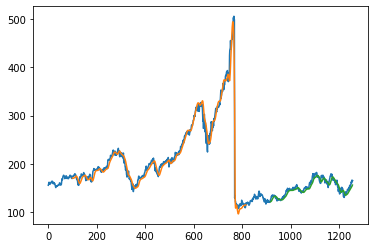

In [83]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [84]:
len(test_data)

440

In [91]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [92]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [93]:
temp_input


[0.13212273011897302,
 0.13470256731371316,
 0.14311834690043823,
 0.14662492172824038,
 0.1552410770194113,
 0.1587226048841578,
 0.16839073262366933,
 0.17001878522229175,
 0.17222291797119593,
 0.18063869755792106,
 0.1776581089542893,
 0.16974326862867878,
 0.16899185973700687,
 0.1793362554790231,
 0.17087038196618654,
 0.16278021289918598,
 0.1635566687539135,
 0.158422041327489,
 0.14755165936130238,
 0.1523356293049467,
 0.15919849718221663,
 0.14639949906073885,
 0.1458484658735128,
 0.15168440826549778,
 0.15125860989355033,
 0.14922980588603624,
 0.13763306199123349,
 0.140363180964308,
 0.1251346274264245,
 0.12455854727614268,
 0.14226675015654344,
 0.12726361928616153,
 0.12804007514088916,
 0.13184721352536,
 0.14822792736380713,
 0.12505948653725735,
 0.12633688165309953,
 0.11326236693800873,
 0.11939887288666245,
 0.09933625547902314,
 0.08946775203506574,
 0.10086412022542268,
 0.09693174702567309,
 0.10619912335629306,
 0.08510958046336875,
 0.0764182842830306,
 0.0

In [94]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)


[0.12885274]
101
1 day input [0.13470257 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073
 0.17001879 0.17222292 0.1806387  0.17765811 0.16974327 0.16899186
 0.17933626 0.17087038 0.16278021 0.16355667 0.15842204 0.14755166
 0.15233563 0.1591985  0.1463995  0.14584847 0.15168441 0.15125861
 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855 0.14226675
 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949 0.12633688
 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412 0.09693175
 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534 0.08395742
 0.08435817 0.09252348 0.107201   0.10519724 0.10487163 0.11113338
 0.096531   0.09843456 0.10487163 0.10299311 0.08966813 0.07586725
 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609 0.07271133
 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711
 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879
 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849 0.10076393
 0.11060739 0.11571697 0.12150282

In [95]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [96]:
import matplotlib.pyplot as plt


In [97]:
len(df1)


1257

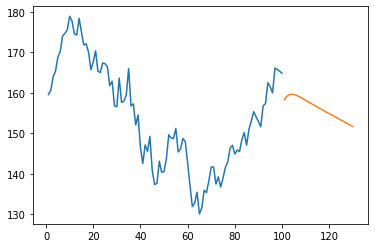

In [99]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

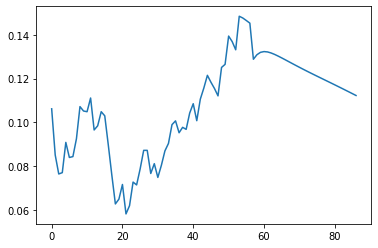

In [100]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [101]:
df3=scaler.inverse_transform(df3).tolist()

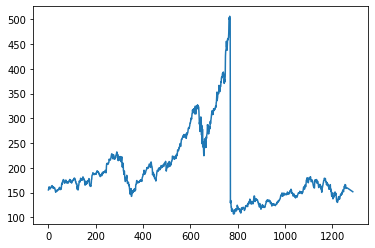

In [102]:
plt.plot(df3)
